In [2]:
import os
import sys
import time
import matplotlib
import pathlib
import graphviz
import itertools
import pycaret
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
#from sklearn import *
import seaborn as sns
from sklearn import tree 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
    plt.ylabel('TP rate',font2)
    plt.xlabel('FP rate',font2)
    plt.title('ROC',font2)
    plt.savefig('ROC.jpg', dpi=300) 
    plt.show()

def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig = plt.gcf( )
    fig.set_size_inches(15.5, 10.5)
    matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
    matplotlib.rcParams['axes.unicode_minus']=False  
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
    plt.ylabel('True0/1',font2)
    plt.xlabel('Pred0/1',font2)
    fig = plt.gcf( )
    fig.set_size_inches(5.5, 4.5)
    plt.savefig('cnf_matirx.jpg', dpi=300)
    plt.show()
    
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
S1 = pd.read_csv("./S1.csv")
S2 = pd.read_csv("./S2.csv")

In [12]:
S1

,name,Tc,H,He,Li,Be,B,C,N,O,...,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,Zr74.1Ti3.9Ni22,3.650,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Zr70.2Ti7.8Ni22,3.320,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Zr66.3Ti11.7Ni22,3.560,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Zr62.4Ti15.6Ni22,3.215,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Zr55Cu30Al10Ni5,1.350,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,Ag0.05Rh0.04Ti0.91,1.950,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12336,Ag0.03Tl0.97,2.670,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12337,Ag0.035Cd0.01Sn0.955,3.650,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12338,Ag0.005Zn0.995,0.763,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
S2

,name,Tc,Cell_Min_Number,Cell_Max_Number,Cell_range_Number,Cell_mean_Number,Cell_reduce_Number,Cell_Min_MendeleevNumber,Cell_Max_MendeleevNumber,Cell_range_MendeleevNumber,...,Cell_Min_PBE_PRACOR,Cell_Max_PBE_PRACOR,Cell_range_PBE_PRACOR,Cell_mean_PBE_PRACOR,Cell_reduce_PBE_PRACOR,Cell_Min_PBE_RCORE,Cell_Max_PBE_RCORE,Cell_range_PBE_RCORE,Cell_mean_PBE_RCORE,Cell_reduce_PBE_RCORE
0,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.000000,1.71253,6.87961,5.16708,23.5614,0.530624,0.851351,44.8894,44.0381,...,0.045946,0.619165,0.573219,1.66081,0.022959,0.064742,0.784275,0.719533,1.98378,0.028161
1,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.800000,2.55429,7.15202,4.59773,23.0241,0.814337,0.894003,44.0582,43.1642,...,0.115684,0.607700,0.492016,1.66909,0.049818,0.115684,0.769753,0.654070,1.97811,0.054318
2,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,135.400000,2.55761,7.16130,4.60369,23.0436,0.814973,0.895163,44.0025,43.1074,...,0.115834,0.606931,0.491098,1.66970,0.049872,0.115834,0.768780,0.652946,1.97870,0.054379
3,Hg1Ba2Ca2Cu3O8.29,135.000000,2.45549,6.87538,4.41989,23.6538,0.840908,0.859423,44.2744,43.4150,...,0.153468,0.610681,0.457213,1.67268,0.054541,0.153468,0.773530,0.620061,1.97672,0.060169
4,Hg1Ba2Ca2Cu3O8.27,135.000000,2.45851,6.88384,4.42532,23.6730,0.841522,0.860479,44.2219,43.3614,...,0.153657,0.609957,0.456300,1.67326,0.054596,0.153657,0.772612,0.618955,1.97728,0.060232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,Ag0.9Ga0.1,0.006500,3.10000,42.30000,39.20000,45.4000,2.888330,7.400000,58.5000,51.1000,...,0.217000,1.800000,1.583000,2.01700,0.193654,0.260000,2.250000,1.990000,2.51000,0.233068
12336,Pt1,0.004157,78.00000,78.00000,0.00000,78.0000,78.000000,63.000000,63.0000,0.0000,...,2.330000,2.330000,0.000000,2.33000,2.330000,2.600000,2.600000,0.000000,2.60000,2.600000
12337,La1.92Sr0.08Cu0.99Ni0.01O4,0.001000,0.04000,15.63430,15.59430,24.7814,0.035934,0.087143,49.7143,49.6271,...,0.002857,0.685714,0.682857,1.62743,0.002523,0.003286,0.868571,0.865286,1.99371,0.002900
12338,Gd0.9Pr0.95Ce0.15Cu1O4,0.001000,1.24286,8.22857,6.98571,26.1929,0.661751,0.321429,49.7143,49.3929,...,0.038571,0.685714,0.647143,1.61786,0.026688,0.057857,0.868571,0.810714,1.98143,0.037057


## Classification model training

### Use pycaret to make a rough assessment of multimodels

In [14]:
CLS1 = pd.read_csv("./CLS1.csv")
CLS2 = pd.read_csv("./CLS2.csv")
dataset = CLS1
dataset 

,name,Tc,H,He,Li,Be,B,C,N,O,...,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.515971,...,0,0,0,0,0,0,0,0,0,0
1,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.506417,...,0,0,0,0,0,0,0,0,0,0
2,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.505776,...,0,0,0,0,0,0,0,0,0,0
3,Hg1Ba2Ca2Cu3O8.29,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508901,...,0,0,0,0,0,0,0,0,0,0
4,Hg1Ba2Ca2Cu3O8.27,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508297,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,Ag0.9Ga0.1,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
12336,Pt1,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
12337,La1.92Sr0.08Cu0.99Ni0.01O4,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.571429,...,0,0,0,0,0,0,0,0,0,0
12338,Gd0.9Pr0.95Ce0.15Cu1O4,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.571429,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data = dataset.sample(frac=0.8, random_state=2020).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Tc', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(9872, 120)"
4,Missing Values,False
5,Numeric Features,82
6,Categorical Features,37
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()    ##Run to get model ranking

In [ ]:
dataset = CLS2
data = dataset.sample(frac=0.8, random_state=2020).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Tc', session_id=123)
compare_models()

### Select the appropriate model for classification (RFC,KNN,DT,ADC)

###  RFC

RFCscore 0.9688006482982172
[0.96272285 0.96758509 0.96110211 0.96231767 0.96231767 0.96231767
 0.96272285 0.96758509 0.95745543 0.96515397]
0.9631280388978931


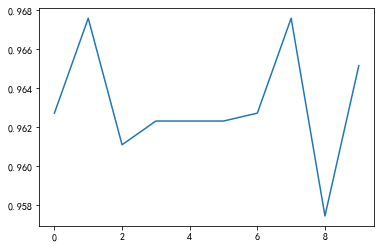

In [17]:
# RFC
data = CLS1
X = data.iloc[:,2:].values
y = data.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
print("RFCscore",rfc.score(X_test, y_test.astype('int')))
cv = ShuffleSplit(n_splits=10, test_size=.2)
scores = cross_val_score(rfc, X, y, cv=cv)
print(scores)
print(scores.mean())
ll = np.linspace(0,9,10)
ll_x = ll
ll_y = scores
plt.plot(ll_x,ll_y)
plt.show( )

###  KNN

In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_search = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]
knn_clf = KNeighborsClassifier()

In [19]:
grid_search = GridSearchCV(knn_clf, param_search)

In [21]:
%%time
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Wall time: 24min 44s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

0.9554294975688817
[0.95488925 0.9632631  0.95353863 0.96137223 0.95488925 0.96083198
 0.95705024 0.96029173 0.95299838 0.95596975 0.96002161 0.96110211
 0.96164236 0.95921124 0.96056186 0.95948136 0.95867099 0.95732037
 0.95894111 0.95705024]
0.9584548892490545


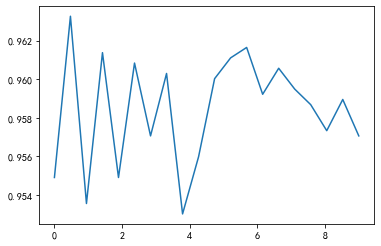

In [22]:
# KNN
X = data.iloc[ : ,2:].values
y = data.iloc[ : ,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')
reg.fit(X_train, y_train.astype('int'))
print(reg.score(X_test, y_test.astype('int')))

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=20, test_size=.3)
scores = cross_val_score(reg, X, y, cv=cv)
print(scores)
print(scores.mean())
ll = np.linspace(0,9,20)
ll_x = ll
ll_y = scores
plt.plot(ll_x,ll_y)
plt.show( )


###  DT

In [24]:
# DT
data = CLS1
X = data.iloc[:,2:].values
y = data.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
data

,name,Tc,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc.1,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Fr,Ra,Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,Rf,Db,Sg,Bh,Hs,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.515971,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.121622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.178133,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.122850,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.040541,0.0,0.020885,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.506417,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.127715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.191881,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.127715,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.046273,0.0,0.000000,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.505776,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.127880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.192129,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.127880,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.046333,0.0,0.000000,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hg1Ba2Ca2Cu3O8.29,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508901,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.122775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.184162,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.122775,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.061387,0.0,0.000000,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hg1Ba2Ca2Cu3O8.27,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508297,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.122926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.184388,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.122926,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.061463,0.0,0.000000,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,Ag0.9Ga0.1,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12336,Pt1,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,

DT 0.9289303079416532
[0.90194489 0.9136953  0.93517018 0.9197731  0.92301459 0.93435981
 0.92341977 0.91774716 0.92909238 0.92949757]
0.9227714748784441


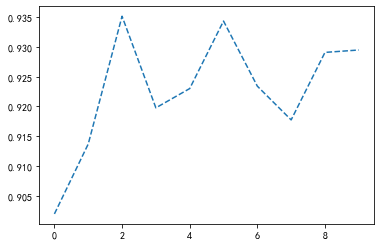

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=7,max_features=30,criterion="entropy") #初始化树模型
clf = clf.fit(X, y)                          #实例化训练集
score = clf.score(X, y)                        #返回预测的准确度
print("DT",score)
cv = ShuffleSplit(n_splits=10, test_size=.2)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)
print(scores.mean())
ll = np.linspace(0,9,10)
ll_x = ll
ll_y = scores
plt.plot(ll_x,ll_y,"--")
plt.show( )

#### Visualization of decision trees

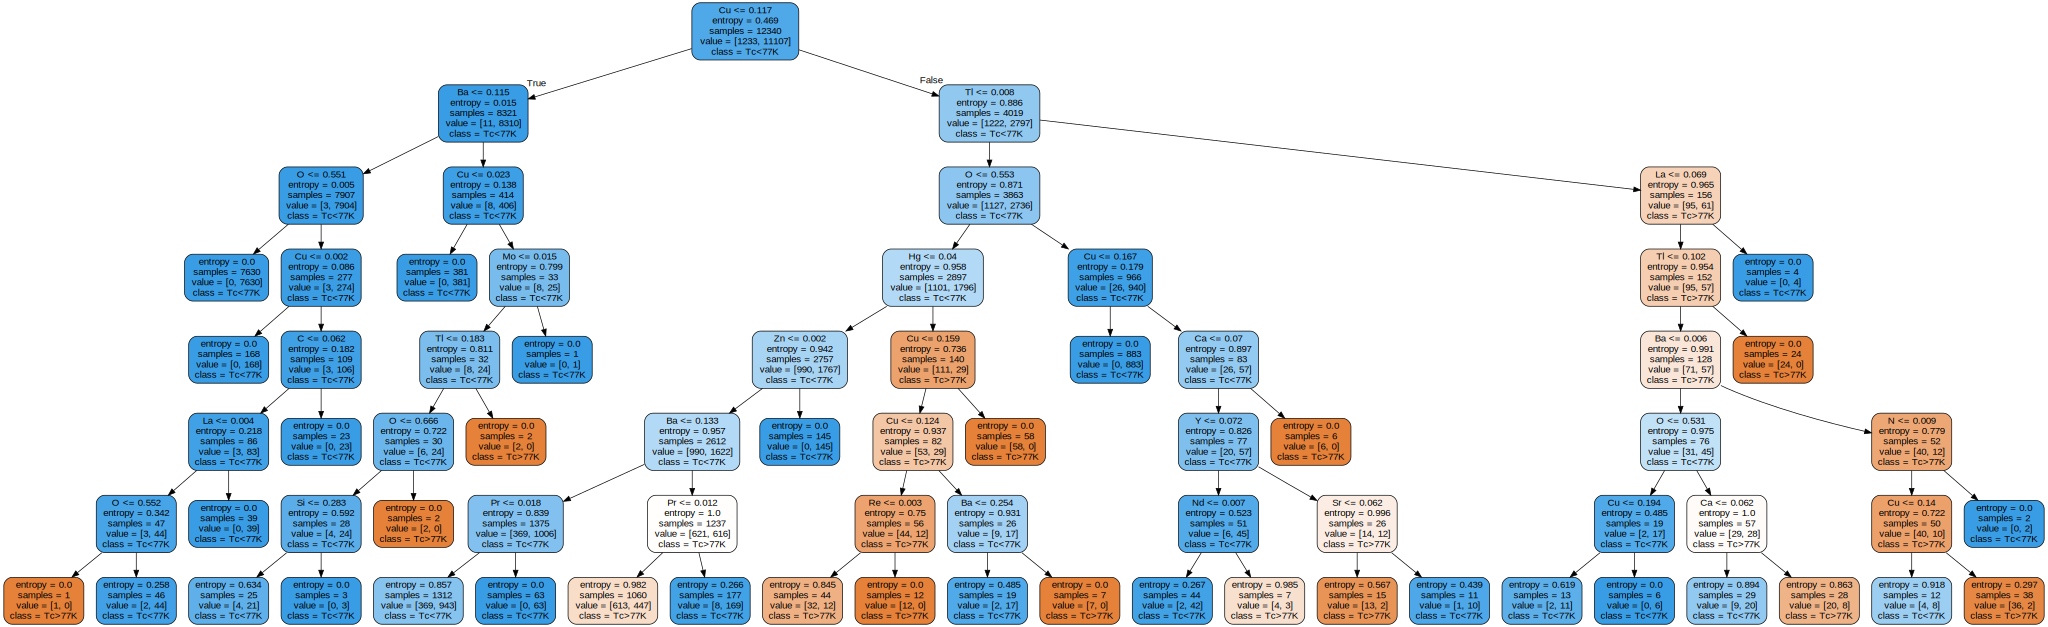

In [26]:
feature_name = data.iloc[:,2:].columns
import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file=None
                                ,feature_names= feature_name 
                                ,class_names=["Tc>77K","Tc<77K"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [ ]:
# graph.render(filename="tree")   ##save DT graph as a pdf

###  ADC

ABCscore 0.9639384116693679
[0.95259319 0.95016207 0.95664506 0.96272285 0.94894652 0.95583468
 0.96272285 0.96231767 0.95948136 0.95137763]
0.9562803889789302


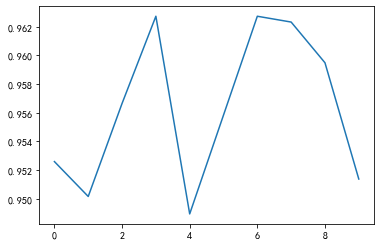

In [27]:
# Ada
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 900)
data = CLS1
X = data.iloc[:,2:].values
y = data.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
abc.fit(X_train,y_train)
print("ABCscore",abc.score(X_test, y_test.astype('int')))
cv = ShuffleSplit(n_splits=10, test_size=.2)
scores = cross_val_score(abc, X, y, cv=cv)
print(scores)
print(scores.mean())
ll = np.linspace(0,9,10)
ll_x = ll
ll_y = scores
plt.plot(ll_x,ll_y)
plt.show( )

### RFC : Analysis of multiple achievement indicators

In [28]:
# RFC
data = CLS1
X = data.iloc[:,2:].values
y = data.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9679902755267423

In [29]:
[*zip(feature_name,clf.feature_importances_)]

[('H', 0.0),
 ('He', 0.0),
 ('Li', 0.0),
 ('Be', 0.0),
 ('B', 0.0),
 ('C', 0.00030784576892363397),
 ('N', 0.0013086906311494484),
 ('O', 0.13239330912422126),
 ('F', 0.0),
 ('Ne', 0.0),
 ('Na', 0.0),
 ('Mg', 0.0),
 ('Al', 0.0),
 ('Si', 0.0002094888929981452),
 ('P', 0.0),
 ('S', 0.0),
 ('Cl', 0.0),
 ('Ar', 0.0),
 ('K', 0.0),
 ('Ca', 0.005234791322591293),
 ('Sc', 0.0),
 ('Ti', 0.0),
 ('V', 0.0),
 ('Cr', 0.0),
 ('Mn', 0.0),
 ('Fe', 0.0),
 ('Co', 0.0),
 ('Ni', 0.0),
 ('Cu', 0.6754194107316458),
 ('Zn', 0.02844648967901897),
 ('Ga', 0.0),
 ('Ge', 0.0),
 ('As', 0.0),
 ('Se', 0.0),
 ('Br', 0.0),
 ('Kr', 0.0),
 ('Rb', 0.0),
 ('Sr', 0.003709653061296583),
 ('Y', 0.003276264994415341),
 ('Zr', 0.0),
 ('Nb', 0.0),
 ('Mo', 0.00012044705103498933),
 ('Tc.1', 0.0),
 ('Ru', 0.0),
 ('Rh', 0.0),
 ('Pd', 0.0),
 ('Ag', 0.0),
 ('Cd', 0.0),
 ('In', 0.0),
 ('Sn', 0.0),
 ('Sb', 0.0),
 ('Te', 0.0),
 ('I', 0.0),
 ('Xe', 0.0),
 ('Cs', 0.0),
 ('Ba', 0.048066222682147296),
 ('La', 0.0024276430134609265),
 ('Ce

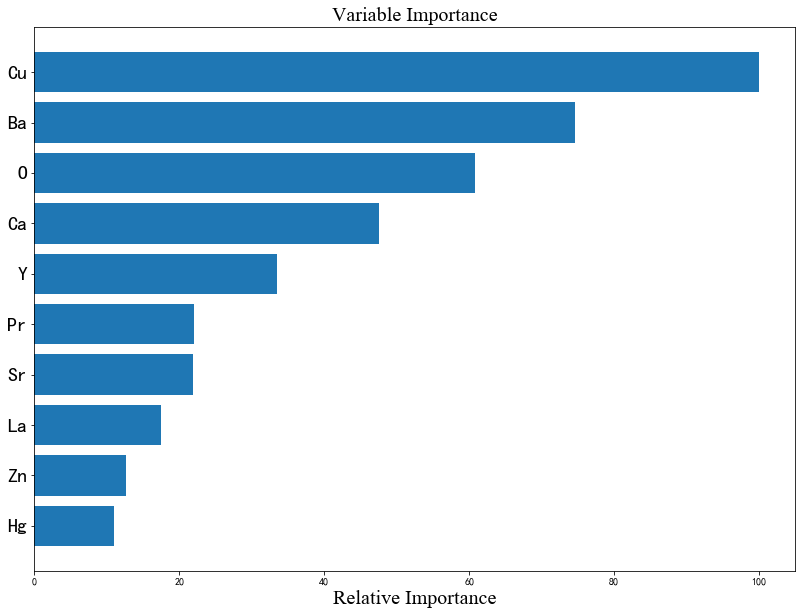

In [30]:
clf = rfc
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[-10:], feature_importance[sorted_idx[-10:]], align='center')
plt.yticks(pos[-10:], data.iloc[:,2:].columns[sorted_idx[-10:]],fontsize=20)
plt.xlabel('Relative Importance',font2)
plt.title('Variable Importance',font2)
fig = plt.gcf( )
fig.set_size_inches(30,10)
#plt.savefig('Variable Importance',dpi=300,bbox_inches="tight")
plt.show()

#### F1 score

In [31]:
from sklearn.metrics import f1_score
y_pred = rfc.predict(X_test)
f1_score(y_test,y_pred)

0.9823305748154776

####  confusion matrix 

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       239
           1       0.98      0.99      0.98      2229

    accuracy                           0.97      2468
   macro avg       0.92      0.90      0.91      2468
weighted avg       0.97      0.97      0.97      2468



In [33]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 193,   46],
       [  33, 2196]], dtype=int64)

<Figure size 1116x756 with 0 Axes>

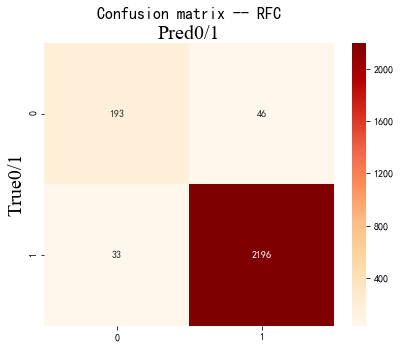

In [34]:
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- RFC')

#### Accuracy and call-back curves

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
rf_clf = rfc
y_probabilities_rf = rf_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities_rf)

0.9901591985448568

<Figure size 1116x756 with 0 Axes>

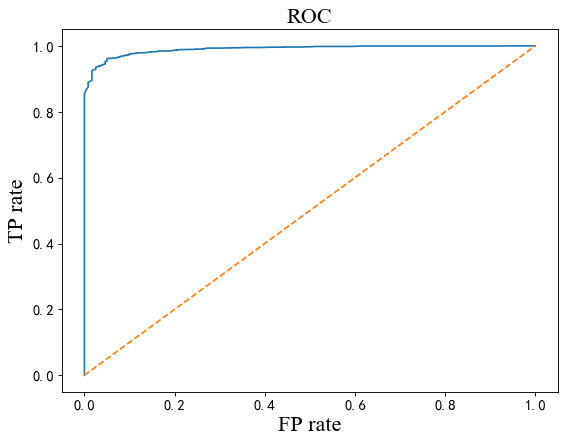

In [36]:
from sklearn.metrics import roc_curve
fprs4,tprs4,thresholds4 = roc_curve(y_test,y_probabilities_rf)
fig = plt.gcf( )
fig.set_size_inches(15.5, 10.5)

plot_roc_curve(fprs4,tprs4)

#plt.savefig('ROC.jpg', dpi=300) 

#### The threshold of model

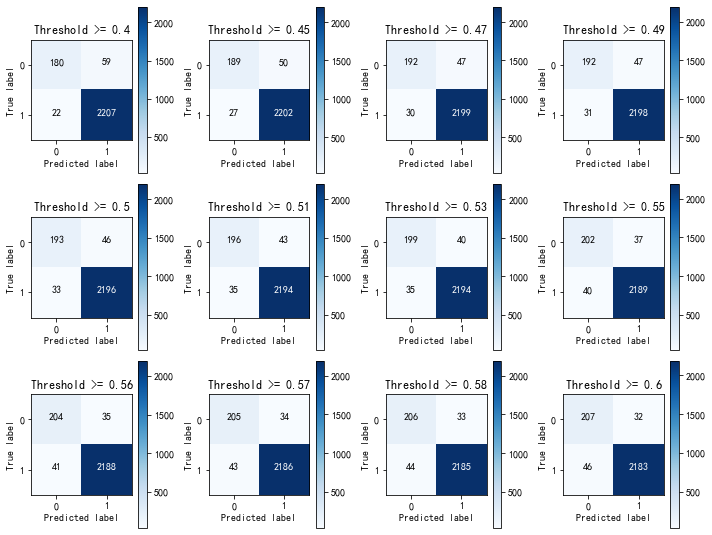

In [37]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

thresholds = [0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.56,0.57,0.58,0.60]
plt.figure(figsize=(10,10))
m = 1
for i in thresholds:
    y_test_predictions_high_recall = y_probabilities_rf > i
    
    plt.subplot(4,4,m)
    m += 1
    
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

 #  print (i,"Recall:{}".format(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
 #   acc = rfc.score(X_test,y_test)
 #   print(acc)
   
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
 #  plt.savefig("before", dpi=300)

#### Cost sensitive learning

#####  Bayes formula：P(A|B)=P(B|A)*P(A)/P(B)

In [38]:
len(data[data["Tc"]==0])

1233

In [39]:
len(data[data["Tc"]==1])

11107

In [43]:
log = []
for i in range(100,900,5):
#    print(i/1000)
    log.append(i/1000)

In [48]:
mg = []
thresholds = log
m = 1
for i in thresholds:
    y_test_predictions_high_recall = y_probabilities_rf > i    
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
#    print(cnf_matrix)
    C01 = cnf_matrix[0][1]
    C10 = cnf_matrix[1][0]
    C00 = cnf_matrix[0][0]
    C11 = cnf_matrix[1][1]
    C =C01+C00+C10+C11
    cost = (1*(C01)/((C11+C10)))+((1.5*C10)/((C11+C01)))
#    cost = 1
#    recall =cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
#    acc = (C00+C11)/C
#    COST = (1/cost)*recall*acc
    COST=cost
#    print(COST)
    mg.append(COST)

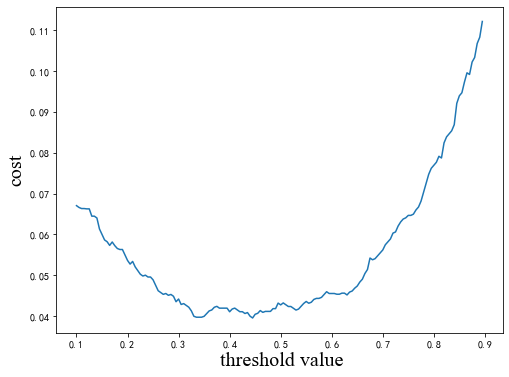

In [49]:
mingan = np.array(mingan)
log = np.array(log)
plt.plot(log,mg)
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}
plt.ylabel('cost',font2)
plt.xlabel(' threshold value',font2)
fig = plt.gcf( )
fig.set_size_inches(8, 6)
#plt.figure(figsize=(8,6))
plt.savefig('cost.jpg', dpi=300)
plt.show( )

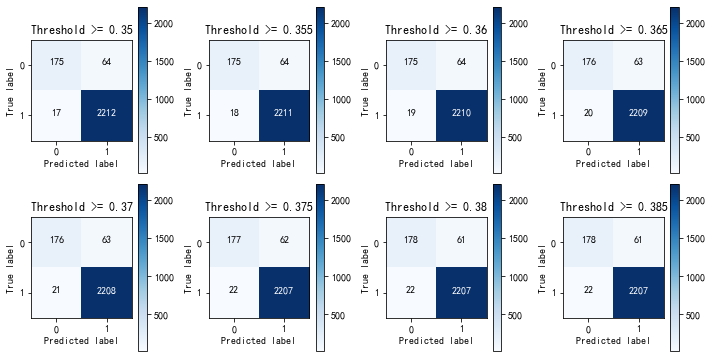

In [50]:
thresholds = [0.350,0.355,0.360,0.365,0.370,0.375,0.380,0.385]
plt.figure(figsize=(10,10))

m = 1
for i in thresholds:
    y_test_predictions_high_recall = y_probabilities_rf > i
    
    plt.subplot(4,4,m)
    m += 1
    
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

#    print (i,"Recall:{}".format(cnf_matrix[0,0]/(cnf_matrix[0,1]+cnf_matrix[0,0])))
 #   acc = rfc.score(X_test,y_test)
 #   print(acc)
   
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
#    plt.savefig("laser", dpi=300)
    